In [174]:
import cv2
import pywt
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
img = cv2.imread('./test_images/Tedy_Afro.jpeg')

In [91]:

# If it's a color image, you can access each channel
# blue = img[50, 100, 0]
# green = img[50, 100, 1]
# red = img[50, 100, 2]

img.shape # returns 3d numpy array (height, width, and channel (3 for rgb or 1 for gray scale))


(225, 225, 3)

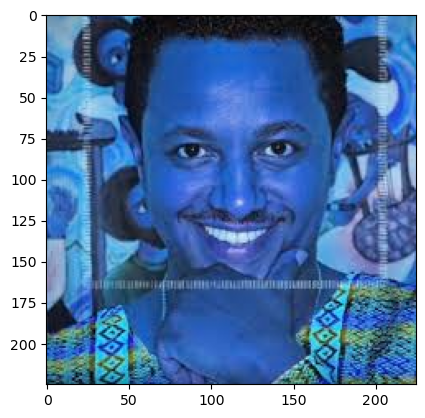

In [4]:
plt.imshow(img)

In [2]:
img = cv2.imread('test_images/Tedy_Afro.jpeg')
img.shape

(225, 225, 3)

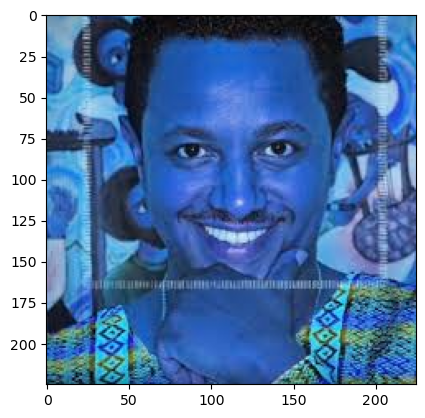

In [3]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(225, 225)

In [7]:
gray

array([[149, 149, 149, ..., 139, 144, 144],
       [150, 150, 150, ..., 141, 145, 146],
       [152, 152, 152, ..., 143, 148, 151],
       ...,
       [ 65,  57,  58, ..., 159, 150,  95],
       [ 77,  58,  44, ..., 138, 100,  84],
       [ 36,  49,  92, ..., 115, 115, 126]], dtype=uint8)

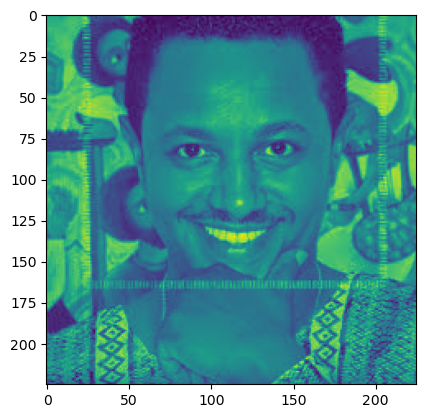

In [10]:
plt.imshow(gray)

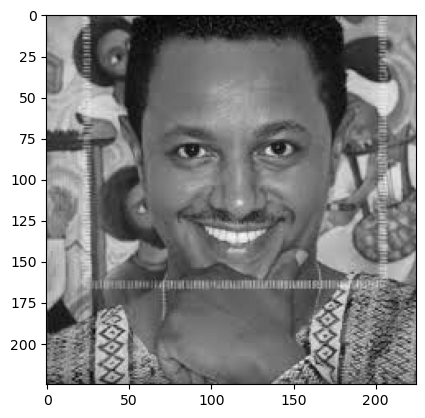

In [5]:
plt.imshow(gray, cmap='gray')

In [176]:
face_cascade = cv2.CascadeClassifier('E:\\RoadMap\\ML Projects\\ML-Image-Classification\\opencv\\haarcascade\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('E:\\RoadMap\\ML Projects\\ML-Image-Classification\\opencv\\haarcascade\\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(img, 1.3, 5)
eyes = eye_cascade.detectMultiScale(img)
faces

array([[ 51,  28, 132, 132]])

In [14]:
(x,y,w,h) = faces[0]
x,y,w,h

(51, 28, 132, 132)

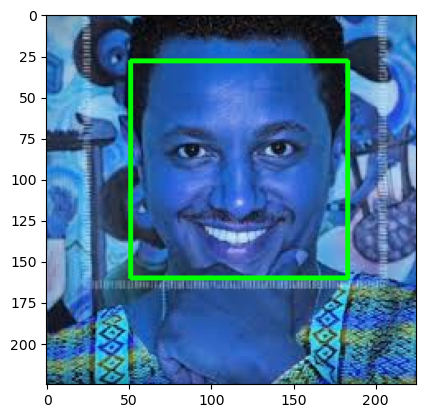

In [15]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2) #draw face
plt.imshow(face_img)

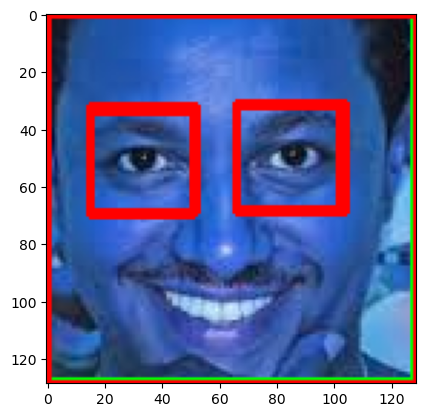

In [34]:
# for (x, y, w, h) in faces:
#     faces_image = cv2.rectangle(img,(x+y))
cv2.destroyAllWindows()
for (x, y, width, height) in faces:
    # face_images = cv2.rectangle(img, (x,y), (x+width, y+height), (255, 0,0), 1) # (255, 0,0) <- is the color of rgb (blue), 2 <- the width of rectangle
    only_face_color = img[y:y+height, x:x+width]
    for (x_eye, y_eye, width_eye, height_eye) in eyes:
        eyes_image = cv2.rectangle(only_face_color, (x_eye,y_eye), (x_eye+width_eye, y_eye+height_eye), (255, 0, 0), 1)
plt.imshow(eyes_image)

In [177]:
#This function returns images if 2 eyes are visible
def get_images_with_2_eyes(path):
    img = cv2.imread(path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, width, height) in faces:
            face_image = cv2.rectangle(gray, (x, y), (x+width, y+height), (255, 0, 0), 1)
            face_region = gray[y:y+height, x:x+width]
            eyes = eye_cascade.detectMultiScale(face_region)
            
            if len(eyes) >= 2:
                return face_region
            



            
            # for (x_eye, y_eye, width_eye, height_eye) in eyes:

            #     eyes_image = cv2.rectangle(gray, (x_eye, y_eye), (x_eye+width_eye, y_eye+height_eye), (255,0,0), 1)
            

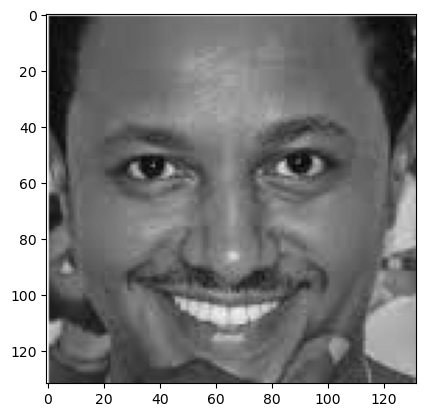

In [45]:
croped_image = get_images_with_2_eyes('./test_images/Tedy_Afro.jpeg')
plt.imshow(croped_image, cmap='gray')

In [178]:
path_to_img_dataset = './datasets/'
path_to_cropped_img_datasets = './datasets/cropped1/'

In [179]:
import os
img_dir = []
for dirs in os.scandir(path_to_img_dataset):
    if dirs.is_dir():
        img_dir.append(dirs.path)
img_dir

['./datasets/Abdu Kiar',
 './datasets/Addis Alem Getaneh',
 './datasets/cropped',
 './datasets/cropped1',
 './datasets/Tedy Afro']

In [180]:
import shutil

#shutil used to easly tree directory
if os.path.exists(path_to_cropped_img_datasets):
    shutil.rmtree(path_to_cropped_img_datasets)
os.makedirs(path_to_cropped_img_datasets)

In [17]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img in img_dirs:
    count = 1
    celebrity_name = img.split('/')[-1]
    print(celebrity_name)
    count +=1

    



Aster Aweke
cropped
Hachalu Hundessa
Haile Gebresilassie
Tedy Afro
Tewodross Adhanom


In [167]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dir:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        # print(entry)
        print(entry)
        roi_color = get_images_with_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_img_datasets + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            print("file_name:",cropped_file_name)
            print("celebrity_name", celebrity_name)
            cv2.imwrite(cropped_file_path, roi_color)
            print(cropped_file_path)

            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Abdu Kiar
<DirEntry '2414542763846912915_42856079164.jpg'>
<DirEntry '2424098640862384526_42856079164.jpg'>
Generating cropped images in folder:  ./datasets/cropped1/Abdu Kiar
<DirEntry '2424098640879396741_42856079164.jpg'>
<DirEntry '2424098640887782062_42856079164.jpg'>
<DirEntry '2424098640904472402_42856079164.jpg'>
<DirEntry '2424098640980074411_42856079164.jpg'>
<DirEntry '2426894401153037564_42856079164.jpg'>
<DirEntry '2426894401161455340_42856079164.jpg'>
<DirEntry '2429285636383886998_42856079164.jpg'>
<DirEntry '2432738889847198057_42856079164.jpg'>
<DirEntry '2432738889863885125_42856079164.jpg'>
<DirEntry '2450329918171397242_42856079164.jpg'>
<DirEntry '2450329918179889926_42856079164.jpg'>
<DirEntry '2450329918188094778_42856079164.jpg'>
<DirEntry '2450329918204963373_42856079164.jpg'>
<DirEntry '2450329918213239781_42856079164.jpg'>
<DirEntry '2450329918221780511_42856079164.jpg'>
<DirEntry '2450329918221808280_42856079164.jpg'>
<DirEntry '2450329918288851443_428560791

KeyboardInterrupt: 